In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Most_recent.csv')

/Users/xiuronglin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,9,31,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1688,1689,1690,1691,1692,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(7058, 1977)

In [4]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMAWDP8_NOTFIRSTTIME_POOLED_SUPP', 'OMENRUP_NOTFIRSTTIME_POOLED_SUPP',
       'OMENRYP_FULLTIME_POOLED_SUPP', 'OMENRAP_FULLTIME_POOLED_SUPP',
       'OMAWDP8_FULLTIME_POOLED_SUPP', 'OMENRUP_FULLTIME_POOLED_SUPP',
       'OMENRYP_PARTTIME_POOLED_SUPP', 'OMENRAP_PARTTIME_POOLED_SUPP',
       'OMAWDP8_PARTTIME_POOLED_SUPP', 'OMENRUP_PARTTIME_POOLED_SUPP'],
      dtype='object', length=1977)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(617), int64(14), object(1346)
memory usage: 106.5+ MB


In [6]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,...,0.4048,0.2645,0.0137,0.315,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.5448,0.12,0.0728,0.2583,0.5872,0.0817,0.1398,0.2618,0.3977,0.2008
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.4647,0.1912,0.0148,0.3284,0.4391,0.2177,0.028,0.3645,0.4486,0.1589
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5121,0.1593,0.0165,0.323,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4226,0.0754,0.0254,0.5327,0.3133,0.1286,0.021,0.5804,0.1678,0.2308


In [7]:
print('The data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The data has 7058 rows and 1977 columns


# 1.What is the most costly college? What is the cheapest?

In [8]:
df['total_tution'] = df['COSTT4_A'].fillna(0) + df['COSTT4_P'].fillna(0)
df = df[df['total_tution'] != 0]

In [9]:
df.groupby('INSTNM')['total_tution'].mean().sort_values(ascending =False)

INSTNM
L3 Commercial Training Solutions Airline Academy                  105745.0
Aviator College of Aeronautical Science and Technology             93704.0
University of Chicago                                              72717.0
Jewish Theological Seminary of America                             72120.0
Columbia University in the City of New York                        71972.0
Harvey Mudd College                                                71917.0
Northwestern University                                            70317.0
Washington University in St Louis                                  69754.0
University of Southern California                                  69547.0
Dartmouth College                                                  69474.0
Drexel University                                                  69462.0
Occidental College                                                 69442.0
Haverford College                                                  69387.0
Claremont McKenna 

In [10]:
df.groupby('INSTNM')['total_tution'].mean().sort_values(ascending =True)

INSTNM
C. Alexander School of Cosmetology                                  3522.0
Instituto Tecnologico de Puerto Rico-Recinto de Ponce               3930.0
Instituto Tecnologico de Puerto Rico-Recinto de San Juan            4007.0
Instituto Tecnologico de Puerto Rico-Recinto de Manati              5025.0
Wes Watkins Technology Center                                       5180.0
Cleveland Community College                                         5185.0
Escuela De Troqueleria Y Herramentaje                               5481.0
J F Ingram State Technical College                                  5496.0
Aparicio-Levy Technical College                                     5705.0
D A Dorsey Technical College                                        5854.0
Kiamichi Technology Center-Durant                                   5894.0
Putnam Career and Technical Center                                  5925.0
Colegio Universitario de San Juan                                   5950.0
Mineral County Voc

In [11]:
#the most costly college is L3 Commercial Training Solutions Airline Academy 
#the cheapest college is C. Alexander School of Cosmetology

# 2.What is the average cost for college for colleges in different parts of the US


In [12]:
df.groupby('STABBR')['total_tution'].mean()

STABBR
AK    20202.666667
AL    20661.987179
AR    18277.480000
AS     7400.000000
AZ    21326.971429
CA    25254.285971
CO    23154.380435
CT    26631.231884
DC    36920.666667
DE    24394.266667
FL    23675.617089
FM     9554.000000
GA    23428.047297
GU    12339.000000
HI    20745.285714
IA    25967.620253
ID    19609.424242
IL    23245.472477
IN    27260.939394
KS    21792.555556
KY    22480.465909
LA    20873.833333
MA    35062.945946
MD    25328.820513
ME    28090.529412
MH     8750.000000
MI    22736.019737
MN    24886.870968
MO    22620.850340
MP     8734.000000
MS    19143.018868
MT    17119.900000
NC    22907.287425
ND    17174.206897
NE    24390.181818
NH    28653.166667
NJ    25148.864286
NM    18100.279070
NV    22693.571429
NY    27910.160000
OH    23277.090909
OK    17511.097345
OR    23797.000000
PA    29006.827044
PR    11653.033058
PW     6085.000000
RI    34898.300000
SC    24322.868687
SD    21214.333333
TN    22750.207792
TX    21572.531335
UT    20058.442623
VA   

In [13]:
#What is the average cost for college for colleges in different parts of the US
df.groupby('STABBR')['total_tution'].mean()

STABBR
AK    20202.666667
AL    20661.987179
AR    18277.480000
AS     7400.000000
AZ    21326.971429
CA    25254.285971
CO    23154.380435
CT    26631.231884
DC    36920.666667
DE    24394.266667
FL    23675.617089
FM     9554.000000
GA    23428.047297
GU    12339.000000
HI    20745.285714
IA    25967.620253
ID    19609.424242
IL    23245.472477
IN    27260.939394
KS    21792.555556
KY    22480.465909
LA    20873.833333
MA    35062.945946
MD    25328.820513
ME    28090.529412
MH     8750.000000
MI    22736.019737
MN    24886.870968
MO    22620.850340
MP     8734.000000
MS    19143.018868
MT    17119.900000
NC    22907.287425
ND    17174.206897
NE    24390.181818
NH    28653.166667
NJ    25148.864286
NM    18100.279070
NV    22693.571429
NY    27910.160000
OH    23277.090909
OK    17511.097345
OR    23797.000000
PA    29006.827044
PR    11653.033058
PW     6085.000000
RI    34898.300000
SC    24322.868687
SD    21214.333333
TN    22750.207792
TX    21572.531335
UT    20058.442623
VA   

<BarContainer object of 59 artists>

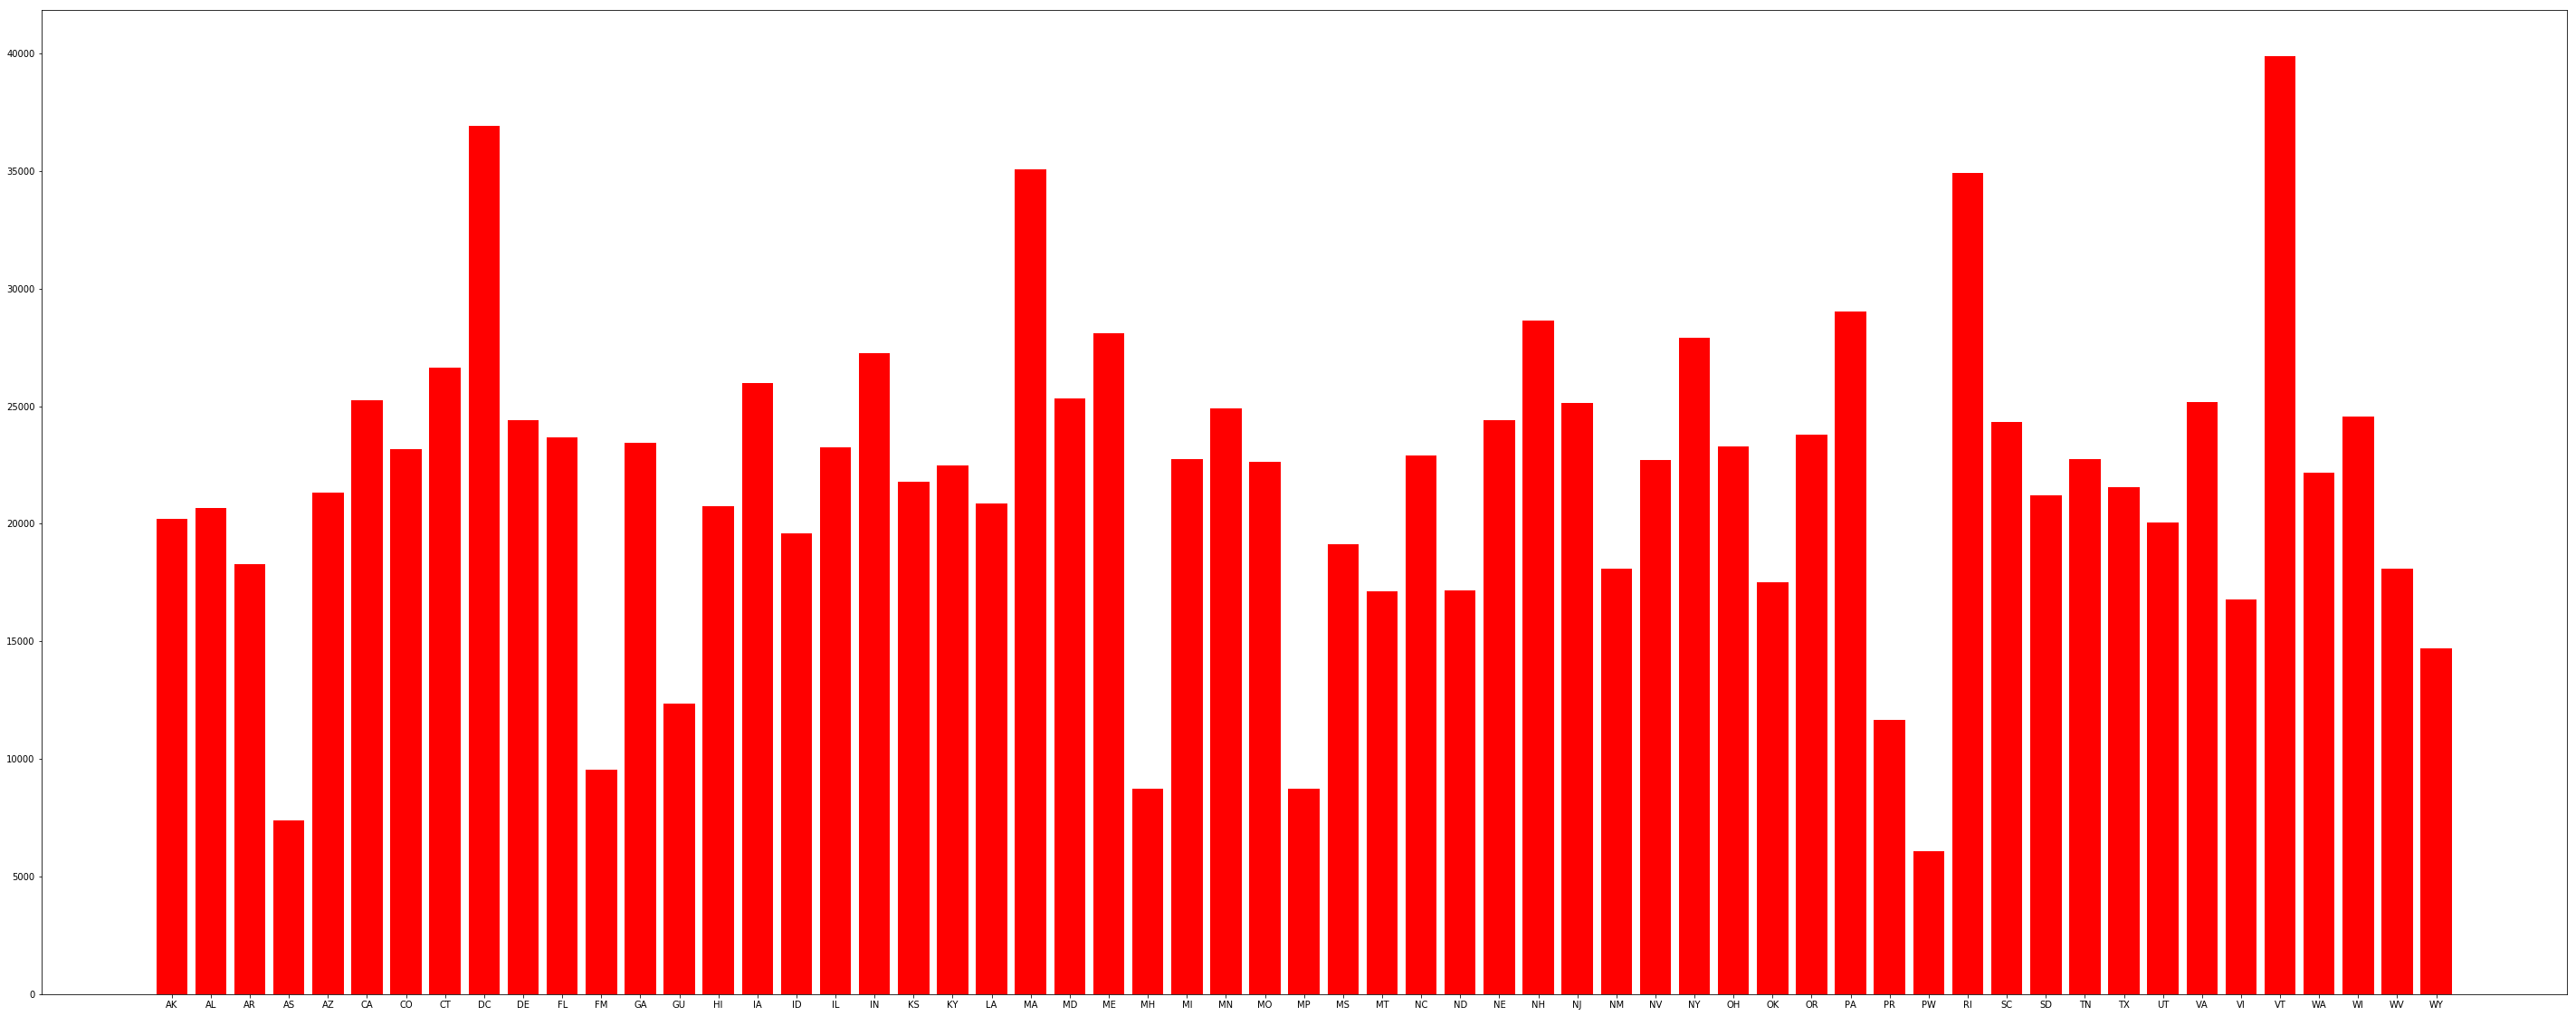

In [14]:
state = df.groupby(['STABBR']).mean()
plt.figure(figsize=(50,20))
plt.bar(state.index,state['total_tution'],color='red')

# 3.What is the average cost of religious vs. secular institutions?

In [15]:
# Create a new dataset indecate the different religions
religiou= df.groupby('RELAFFIL').mean()
# Create a new dataset indecate the doesn't have religions
secular = df[df['RELAFFIL'].isnull()]

rel = religiou['total_tution'].mean()
sec = secular['total_tution'].mean()


In [16]:
rel

35304.21875642725

In [17]:
sec

21895.61946729338

In [18]:
#"The average cost of all religious institutions is $35304.21875642725
#The average cost of all secular institutions is $21895.61946729338

# 4.What percent of colleges have an open admission policy?

In [19]:
# Open admission is represented by the column OPENADMP
# Colleges with an open admission policy are represented by 1.0
adm = df[df['OPENADMP'].notnull()]
openadm = adm.groupby('OPENADMP').size()
openrate = float(openadm[1.0]) / len(df['OPENADMP']) * 100
openrate = round(openrate,2) 

In [20]:
print(openrate)

65.76


In [21]:
#65.76 percent of colleges have an open admission policy

# 5.What is the correlation (scatterplot) between admission rates and college cost?

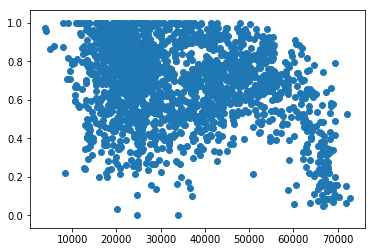

In [22]:
plt.scatter(df['total_tution'], df['ADM_RATE'])

# 6.What is the correlation between SAT scores and admission rates? Are there any outliers?

In [23]:
corr=df.corr()

In [24]:
corr

,UNITID,OPEID,OPEID6,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,...,OMENRUP_NOTFIRSTTIME,OMENRYP_FULLTIME,OMENRAP_FULLTIME,OMAWDP8_FULLTIME,OMENRUP_FULLTIME,OMENRYP_PARTTIME,OMENRAP_PARTTIME,OMAWDP8_PARTTIME,OMENRUP_PARTTIME,total_tution
UNITID,1.000000,0.404391,0.703476,-0.403578,0.060837,-0.399365,0.218942,-0.416574,-0.411594,0.482515,...,0.145377,-0.042959,-0.289722,0.063716,0.165000,-0.027792,-0.235909,0.035847,0.149171,-0.135507
OPEID,0.404391,1.000000,0.506002,-0.222312,0.032336,-0.122262,0.208191,-0.226693,-0.225232,0.315501,...,0.120772,-0.008380,-0.179799,-0.024328,0.166552,0.022581,-0.251556,0.028747,0.154013,-0.123956
OPEID6,0.703476,0.506002,1.000000,-0.564070,0.075663,-0.067748,-0.009493,-0.565021,-0.565996,0.555806,...,0.176782,-0.017061,-0.332451,0.051463,0.206570,0.028471,-0.287530,0.027627,0.180179,-0.231899
SCH_DEG,-0.403578,-0.222312,-0.564070,1.000000,-0.005817,0.147829,0.035107,0.946966,0.899707,-0.401863,...,-0.217223,-0.019971,0.239914,0.106959,-0.293151,-0.098456,0.073843,0.178739,-0.194677,0.472730
HCM2,0.060837,0.032336,0.075663,-0.005817,1.000000,-0.083521,0.117531,0.000228,-0.009318,0.093042,...,0.134129,-0.000542,-0.064084,-0.063627,0.116856,-0.017747,-0.091773,-0.075054,0.142310,-0.006195
MAIN,-0.399365,-0.122262,-0.067748,0.147829,-0.083521,1.000000,-0.541109,0.167519,0.137340,-0.311192,...,-0.166226,-0.002759,0.218658,0.001227,-0.170410,-0.013196,0.159551,0.027880,-0.140696,0.014980
NUMBRANCH,0.218942,0.208191,-0.009493,0.035107,0.117531,-0.541109,1.000000,0.014370,0.051479,0.221663,...,0.181294,-0.007416,-0.109640,-0.071317,0.161486,-0.024178,-0.080814,-0.046486,0.109423,0.026661
PREDDEG,-0.416574,-0.226693,-0.565021,0.946966,0.000228,0.167519,0.014370,1.000000,0.902380,-0.401687,...,-0.226727,-0.042180,0.223789,0.129895,-0.303184,-0.106725,0.076461,0.196673,-0.210647,0.476438
HIGHDEG,-0.411594,-0.225232,-0.565996,0.899707,-0.009318,0.137340,0.051479,0.902380,1.000000,-0.382893,...,-0.236672,-0.059235,0.099332,0.250215,-0.330512,-0.062875,-0.005540,0.286352,-0.244499,0.483530
CONTROL,0.482515,0.315501,0.555806,-0.401863,0.093042,-0.311192,0.221663,-0.401687,-0.382893,1.000000,...,0.062941,-0.173011,-0.435858,0.325987,0.024427,0.004302,-0.355830,0.184632,0.091812,0.160201


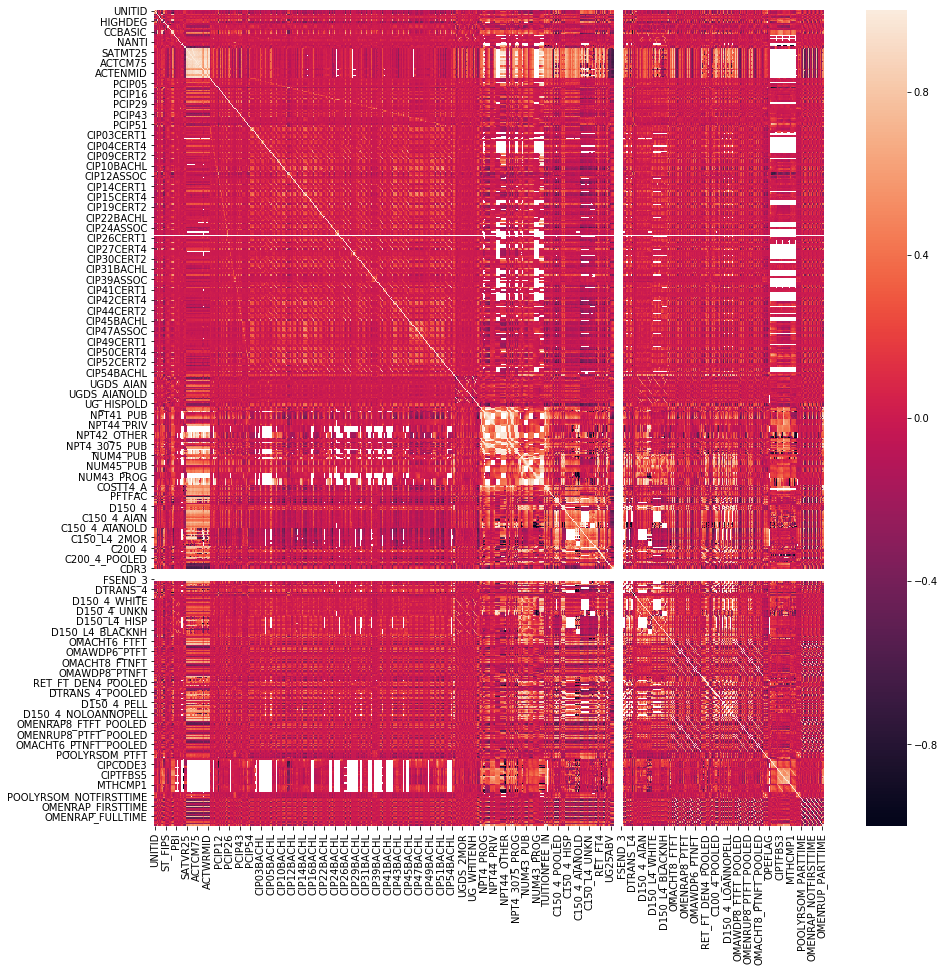

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(corr)

In [26]:
df['SAT_AVG'].corr(df['ADM_RATE'])

-0.4106203354294415

In [27]:
#the correlation between SAT scores 
#     and admission rates is -0.4106203354294415 which means it's weak correlation

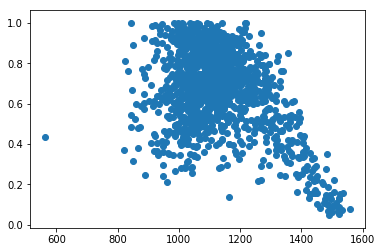

In [28]:
plt.scatter(df['SAT_AVG'], df['ADM_RATE'])

In [29]:
#yes there is a outliar